In [1]:
import numpy as np
import os
from scipy import *
import pandas as pd
from matplotlib.pyplot import *
import sklearn
from sklearn import utils
import pickle

import random

In [2]:
def load_data(npoints, data_dir = "../Data/Experimental data/Synthetic Particles (IAC, 21)/"):
    path_files_TD = [f for f in os.listdir(data_dir) if f.endswith('.dat')]  # search forlder for data files
    
    path_files_TD = sorted(path_files_TD)
    
    #store the info for each file
    x_windows = [] #xdata  
    y_windows = [] #ydata
    zsum_windows = [] #intensity data
    
    nsegments_min = []
    for file in range(len(path_files_TD)):
        current_dir = "".join((data_dir,path_files_TD[file]))
        
        current_df = pd.read_csv(current_dir,skiprows=2,header=None,delimiter='\t')
        
        nsegments = int(len(current_df[0])/npoints)
        nsegments_min.append(nsegments)
        
        # make array of nsegments
        #xx = np.array(current_df[0])[:nsegments*npoints]
        #yy = np.array(current_df[1])[:nsegments*npoints]
        #zsum = np.array(current_df[2])[:nsegments*npoints]
        # separate data onto n segments
        
        x_windows.append(random.sample([current_df[0][int(i*npoints):int((i+1)*npoints)] for i in range(nsegments)], nsegments))
        y_windows.append(random.sample([current_df[1][int(i*npoints):int((i+1)*npoints)] for i in range(nsegments)], nsegments))
        #zsum_windows.append(random.sample([zsum[int(i*npoints):int((i+1)*npoints)] for i in range(nsegments)], nsegments))
        
        print(current_dir + " Read "+ str(nsegments) + " segments", end = '\r')
    
    x_windows = np.array(x_windows)
    y_windows = np.array(y_windows)
    
    nsegments_min = min(nsegments_min)
    x_windows = x_windows[:,:nsegments_min]
    y_windows = y_windows[:,:nsegments_min]
    
    print(x_windows.shape)
    
    
    #del current_df
    #del nsegments
    
    targets = np.array([path_files_TD[i].replace(".dat","")[:-1] for i in range(len(path_files_TD))]) #type of target
    print(targets.shape)
    #del path_files_TD
    
    #test_targets, counts = np.unique(target, return_counts=True)  # counting data sets for each particle type
    #print("Target count =", dict(zip(test_targets, counts)))
    #del counts
    
    # routine to separate one particle data set for testing of the training. one dataset per particle
    #xtest_data = []
    #ytest_data = []
    #test_targets1 = []
    #for i in range(len(test_targets)):
    #    index = np.random.choice(np.where(test_targets[i] == target)[0],1)[0]
    #    for j in range(len(x_windows[index])):
    #        xtest_data.append(x_windows[index][j])
    #        ytest_data.append(y_windows[index][j])
    #        test_targets1.append(target[index])
    #    x_windows = np.delete(x_windows, index, axis=0)
    #    y_windows = np.delete(y_windows, index, axis=0)
    #    target = np.delete(target, index)
    
    # reshape training data set to [nsegments for each particle, positions]
    #xtrain_data = []
    #train_target = []
    #for i in range(len(x_windows)):
    #    for j in range(len(x_windows[i])):
    #        xtrain_data.append(x_windows[i][j])
    #        train_target.append(target[i])
    #del x_windows

        
    #ytrain_data = []
    #for i in range(len(y_windows)):
    #    for j in range(len(y_windows[i])):
    #        ytrain_data.append(y_windows[i][j])
    #del y_windows
    
    # making individual training sets
    #x_windows = np.reshape(x_windows, (int(x_windows.shape[0]*x_windows.shape[1]),x_windows.shape[2]))
    #y_windows = np.reshape(y_windows, (int(y_windows.shape[0]*y_windows.shape[1]),y_windows.shape[2]))
    #zsum_windows = np.reshape(zsum_windows, (int(zsum_windows.shape[0]*zsum_windows.shape[1]),zsum_windows.shape[2]))
    #target = np.repeat(target, nsegments)
    
    # making individual testing sets
    #xtest_data = np.reshape(xtest_data, (int(xtest_data.shape[0]*xtest_data.shape[1]), xtest_data.shape[2]))
    #ytest_data = np.reshape(ytest_data, (int(ytest_data.shape[0]*ytest_data.shape[1]), ytest_data.shape[2]))
    #test_targets = np.repeat(test_targets, nsegments)
    #return train_target, xtrain_data, ytrain_data, zsum_windows, xtest_data, ytest_data, test_targets1
    return targets, x_windows, y_windows, zsum_windows

In [3]:
#folder = "D:\\data OT - TT\\TotalData\\"  # for Linux
npoints   =  50000
target, x_data, y_data, sum_data = load_data(npoints)

(36, 30, 50000)ental data/Synthetic Particles (IAC, 21)/water6.dat Read 30 segmentsts
(36,)


(36, 30, 50000)

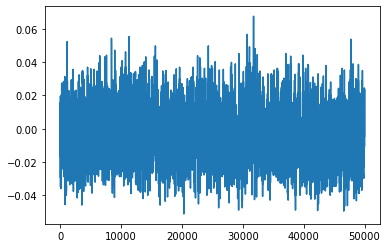

In [4]:
subplots()
plot(y_data[10][0])
y_data.shape

# Pickling Dictionary

In [5]:
def make_image(xdata, ydata, P):  # data format [image, position data] and P is the number of bins
    images = np.zeros((len(xdata),P,P))
    xmax, xmin = np.max(xdata), np.min(xdata)
    xmin, xmax = -0.05, 0.05
    xedges = np.linspace(xmin, xmax, P+1)
    ymax, ymin = np.max(ydata), np.min(ydata)
    ymin, ymax = -0.05, 0.05
    yedges = np.linspace(ymin, ymax, P+1)
    for p in range(len(xdata)):
        #hist, xbins, ybins = np.histogram2d(xdata[p],ydata[p], bins=(xedges, yedges))
        hist, xbins, ybins = np.histogram2d(xdata[p]-np.mean(xdata[p]),ydata[p]-np.mean(ydata[p]), bins=(xedges, yedges))
        images[p] = hist/np.max(hist)
    return images

In [6]:
target

array(['3umPMMA', '3umPMMA', '3umPMMA', '3umPMMA', '3umPMMA', '3umPMMA',
       '3umPOLY', '3umPOLY', '3umPOLY', '3umPOLY', '3umPOLY', '3umPOLY',
       '4umPOLY', '4umPOLY', '4umPOLY', '4umPOLY', '4umPOLY', '4umPOLY',
       '8umPMMA', '8umPMMA', '8umPMMA', '8umPMMA', '8umPMMA', '8umPMMA',
       '8umPOLY', '8umPOLY', '8umPOLY', '8umPOLY', '8umPOLY', '8umPOLY',
       'water', 'water', 'water', 'water', 'water', 'water'], dtype='<U7')

In [7]:
np.random.choice([0,1,2,3,4,5],3)

array([4, 5, 5])

In [8]:
P = 32
print(x_data.shape)

#database = utils.Bunch(target=training_target, train_images=images, test_target=target1, test_images=test_images)

particles_per_type = 6

x_train=[]
y_train=[]
x_test=[]
y_test=[]
target_train=[]
target_test=[]

test_set = np.random.choice([0,1,2,3,4,5],1)

for particle in range(0,len(x_data)):
    
    if particle%6 in test_set:
        #print(target[particle], ' test')
        for i in range(0,len(x_data[particle,:])):
            x_test.append(x_data[particle,i])
            y_test.append(y_data[particle,i])
            target_test.append(target[particle])
        #x_test.append(x_data[particle,:])
        #y_test.append(y_data[particle,:])
        
    else:
        for i in range(0,len(x_data[particle])):
            x_train.append(x_data[particle,i])
            y_train.append(y_data[particle,i])
            target_train.append(target[particle])
        #print(target[particle],' train')
        #x_train.append(x_data[particle,:])
        #y_train.append(y_data[particle,:])

x_test = np.array(x_test)
x_train = np.array(x_train)
y_test = np.array(y_test)
y_test.shape

print(x_train.shape)
print(x_test.shape)

(36, 30, 50000)
(900, 50000)
(180, 50000)


In [9]:
x_train.shape

(900, 50000)

In [10]:
P=100
train_images = make_image(x_train,y_train,P)
test_images = make_image(x_test,y_test,P)

In [14]:
test_images.shape

(180, 100, 100)

In [15]:
import matplotlib.pyplot as plt
import numpy as np
#scikit learn 
from sklearn import datasets, svm, metrics, ensemble, neural_network
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn

In [16]:
import sklearn.ensemble

# flatten the images
n_train = len(train_images)
n_test = len(test_images)

X_train = train_images.reshape((n_train, -1))
X_test = test_images.reshape((n_test, -1))


Y_train = target_train
Y_test = target_test

# Create a classifier: a support vector classifier
model = sklearn.ensemble.RandomForestClassifier(n_estimators=300)
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(100))

# Learn the digits on the train subset
model.fit(X_train, Y_train)

# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

/home/vic/anaconda3/envs/keras_cpu/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


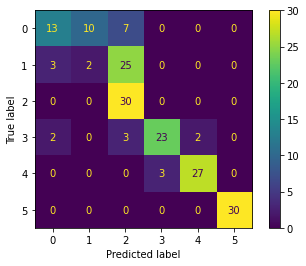

In [17]:
cm = confusion_matrix(Y_test, predicted)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [18]:
import matplotlib.pyplot as plt
import numpy as np

#scikit learn 
from sklearn import datasets, svm, metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import sklearn


from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils.vis_utils import plot_model

In [19]:
Y_new_train = np.copy(Y_train)
Y_new_test = np.copy(Y_test)
for i in range(0,len(np.unique(target))):
    Y_new_train = np.where(np.array(Y_train) == np.unique(target)[i],i, Y_new_train)
    Y_new_test = np.where(np.array(Y_test) == np.unique(target)[i],i, Y_new_test)

In [20]:
X_train.shape

(900, 10000)

In [21]:
X_train.shape

(900, 10000)

In [22]:
Y_k_train.shape

NameError: name 'Y_k_train' is not defined

In [23]:
# load data

# reshape to be [samples][width][height][channels]

# one hot encode outputs
Y_k_train = np_utils.to_categorical(Y_new_train)
Y_k_test = np_utils.to_categorical(Y_new_test)

X_train = train_images
X_test = test_images

X_train = X_train.reshape(train_images.shape[0], P, P, 1).astype('float32')
X_test = X_test.reshape(test_images.shape[0], P, P, 1).astype('float32')

##############

X_train = np.concatenate([X_train,X_train[:,::-1,:],X_train[:,:,::-1]], axis=0)
Y_k_train = np.concatenate([Y_k_train,Y_k_train,Y_k_train],axis=0)

#############
num_classes = Y_k_test.shape[1]

def larger_model():
# create model
    model = Sequential()
    model.add(Conv2D(30, (5, 5), input_shape=(100, 100, 1), activation='relu'))
    model.add(MaxPooling2D())
    #model.add(Conv2D(30, (5, 5), activation='relu'))
    #model.add(MaxPooling2D())
    model.add(Conv2D(20, (3, 3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# build the model
model = larger_model()
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 20)        5420      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 20)        0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 10580)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [24]:
X_test.shape

(180, 100, 100, 1)

In [25]:
Y_k_test.shape

(180, 6)

In [26]:
# Fit the model
model.fit(X_train, Y_k_train, validation_data=(X_test, Y_k_test), epochs=20, batch_size=100, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, Y_k_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
27/27 - 24s - loss: 0.9921 - accuracy: 0.6396 - val_loss: 1.5676 - val_accuracy: 0.4000
Epoch 2/20
27/27 - 23s - loss: 0.5108 - accuracy: 0.8033 - val_loss: 1.9078 - val_accuracy: 0.4444
Epoch 3/20
27/27 - 23s - loss: 0.4186 - accuracy: 0.8430 - val_loss: 1.8250 - val_accuracy: 0.5000
Epoch 4/20
27/27 - 24s - loss: 0.4092 - accuracy: 0.8341 - val_loss: 2.0948 - val_accuracy: 0.5222
Epoch 5/20
27/27 - 23s - loss: 0.3831 - accuracy: 0.8470 - val_loss: 1.9516 - val_accuracy: 0.5111
Epoch 6/20
27/27 - 23s - loss: 0.3538 - accuracy: 0.8578 - val_loss: 1.8387 - val_accuracy: 0.6333
Epoch 7/20
27/27 - 23s - loss: 0.3262 - accuracy: 0.8726 - val_loss: 1.6729 - val_accuracy: 0.6111
Epoch 8/20
27/27 - 23s - loss: 0.2816 - accuracy: 0.8856 - val_loss: 2.1151 - val_accuracy: 0.5889
Epoch 9/20


KeyboardInterrupt: 

In [ ]:
X_train

In [ ]:
predicted = model.predict(X_test)
cm = confusion_matrix(np.argmax(Y_k_test,axis=1), np.argmax(predicted,axis=1))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
show()

In [ ]:
P = 50

print(x_data.shape)

training_target = np.unique(target, return_counts=True)[0]

# selecting one particle of each for the training of the model
ntrain = 5  # number of particles for training sample
xtrain = np.zeros((int(ntrain*training_target.shape[0]), x_data.shape[2]))
ytrain = np.zeros(xtrain.shape)
for i in range(training_target.shape[0]):
    for n in range(ntrain):
        index = np.random.choice(np.where(training_target[i] == target)[0],1)
        xtrain[int(ntrain*i+n),:] = x_data[index,0] # 2nd index 0 is the 1st segment, another can be chosen
        ytrain[int(ntrain*i+n),:] = y_data[index,0]
        target = np.delete(target, index, 0)
        x_data = np.delete(x_data, index, 0)
        y_data = np.delete(y_data, index, 0)

training_target = np.repeat(training_target, ntrain)
print(target.shape)

# the remaining data is used for testing the model

xtest = x_data[:,:,:]
ytest = y_data[:,:,:]

xtest = np.reshape(x_data, (int(x_data.shape[0]*x_data.shape[1]), x_data.shape[2]))
ytest = np.reshape(y_data, (int(y_data.shape[0]*y_data.shape[1]), y_data.shape[2]))


# make training images
images = make_image(xtrain, ytrain, P)

# make test images
test_images = make_image(xtest, ytest, P)

target1 = np.repeat(target,x_data.shape[1])

print(target1.shape)
print(test_images.shape)
print(training_target.shape)
print(images.shape)


In [ ]:
images.shape

In [ ]:
# create dictionary
#database = utils.Bunch(target=training_target, train_images=images, test_target=target, test_images=test_images)
database = utils.Bunch(target=training_target, train_images=images, test_target=target1, test_images=test_images)

# saving pickle
savedir = "../Data/Experimental data/Synthetic Particles (IAC, 21)/Pickle/"
import os
if not (os.path.exists(savedir)):
    os.makedirs(savedir)
    
with open(savedir+'Synthetic particle data.pickle', 'wb') as f:
    pickle.dump(database, f)

In [ ]:
subplots()
imshow(test_images[0])

In [ ]:
images.shape